# Exercise 4.9 – Part 2: Customer Visualizations

This notebook focuses on creating exploratory visualizations using the fully prepared Instacart dataset, including customer information added in Part 1. The visualizations support descriptive analysis of sales behavior, customer loyalty, spending patterns, and demographics to inform marketing strategy.

In [1]:
# ----------------------------------------
# Exercise 4.9 – Part 2
# Import required libraries
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# ----------------------------------------
# Load prepared Instacart dataset (Exercise 4.9)
# ----------------------------------------

path_prepared = r"F:\Data Analytics\Projects\Instacart_Basket_Analysis\Instacart Basket Analysis 01-05-2026\02 Data\Prepared Data"
file_name = "instacart_prepared_exercise_4_9.pkl"

df = pd.read_pickle(os.path.join(path_prepared, file_name))

# Confirm structure
df.shape

(32641268, 27)

### Step 2: Visualization Techniques (Previously Completed)

The required visualization techniques for this Exercise—including bar charts, histograms, scatterplots, and line charts—were completed earlier during the Exercise 4.9 lesson and prior exercises.

These visualizations demonstrated:
- Categorical distributions using bar charts
- Continuous variable distributions using histograms
- Relationships between numeric variables using scatterplots
- Trend analysis using line charts with appropriate sampling techniques

As a result, Step 2 has already been satisfied, and the following steps focus on applying these visualization methods to specific business questions.

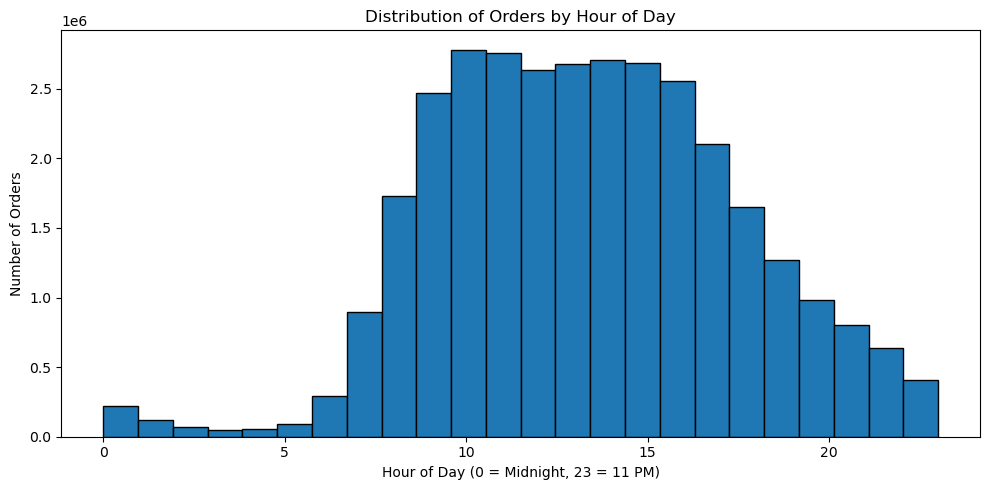

In [3]:
# ------------------------------------------
# Step 3: Histogram – Orders by Hour of Day
# ------------------------------------------

# Inspect distribution of order times across the day
plt.figure(figsize=(10, 5))

plt.hist(
    df['order_hour_of_day'],
    bins=24,
    edgecolor='black'
)

plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

### Step 3B: Histogram Interpretation – Orders by Hour of Day

The histogram shows that customer orders are not evenly distributed across the day.  
Order volume is lowest during late night and early morning hours (approximately midnight to 6 AM), then increases steadily in the morning.

Order activity peaks during late morning through early afternoon hours, with the highest concentration of orders occurring roughly between 9 AM and 3 PM. After this peak period, order volume gradually declines into the evening.

This pattern suggests that customers are most active on Instacart during daytime hours, likely aligning with meal planning, grocery restocking, and daytime routines rather than late-night shopping behavior.


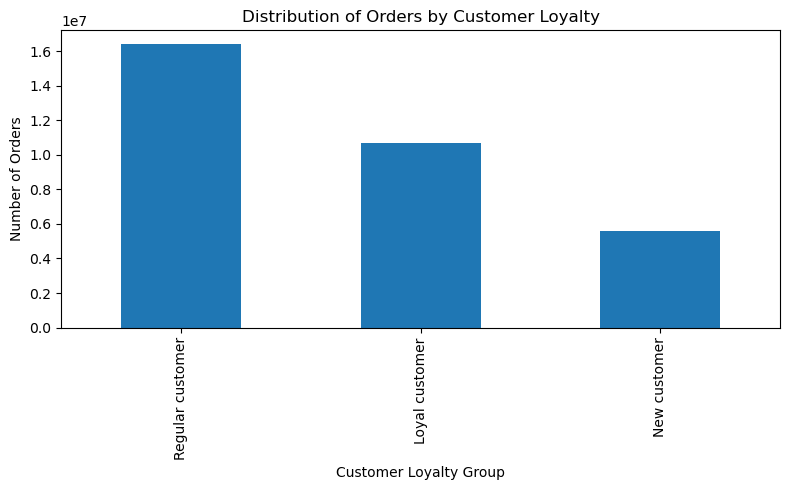

In [4]:
# -----------------------------------------------
# Step 4: Bar Chart – Distribution of Orders by Loyalty
# -----------------------------------------------
# This bar chart shows how orders are distributed
# across customer loyalty groups.

plt.figure(figsize=(8, 5))

df['loyalty_flag'].value_counts().plot(
    kind='bar'
)

plt.title('Distribution of Orders by Customer Loyalty')
plt.xlabel('Customer Loyalty Group')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

### Step 4B: Bar Chart Interpretation – Customer Loyalty Distribution

The bar chart shows that the majority of orders come from Regular and Loyal customers, while New customers contribute a smaller share of total orders.

This indicates that repeat customers account for most Instacart activity, suggesting strong customer retention once users move beyond their initial orders. Loyal customers, in particular, represent a key segment driving sustained order volume.

These findings highlight the importance of retention-focused marketing strategies, such as loyalty incentives and personalized promotions, to maintain engagement among existing customers.

In [5]:
# ---------------------------------------
# Step 5A: Create reproducible sample
# ---------------------------------------

np.random.seed(4)

sample_mask = np.random.rand(len(df)) <= 0.7
df_sample = df[sample_mask]

# Confirm sample size
df_sample.shape

(22849745, 27)

In [6]:
# ---------------------------------------
# Step 5B: Aggregate average prices by hour of day
# ---------------------------------------

price_by_hour = (
    df_sample
    .groupby('order_hour_of_day')['prices']
    .mean()
    .reset_index()
)

price_by_hour.head()

,order_hour_of_day,prices
0,0,9.768550
1,1,10.204380
2,2,17.343916
3,3,15.159261
4,4,12.545739


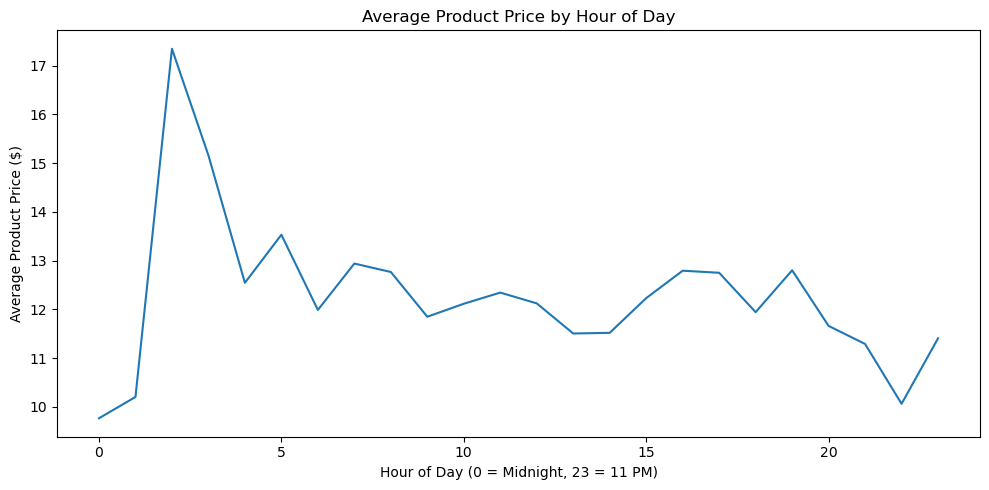

In [7]:
# ---------------------------------------
# Step 5C: Line Chart – Average Expenditure by Hour of Day
# ---------------------------------------

plt.figure(figsize=(10, 5))

plt.plot(
    price_by_hour['order_hour_of_day'],
    price_by_hour['prices']
)

plt.title('Average Product Price by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Average Product Price ($)')

plt.tight_layout()
plt.show()

### Step 5D: Line Chart Interpretation – Expenditure by Hour of Day

The line chart shows that average product prices vary modestly across the day, with a noticeable peak during the early morning hours (around 2–3 AM). After this early spike, average prices generally stabilize and fluctuate within a relatively narrow range throughout the remainder of the day.

This suggests that while there is some time-based variation in expenditure—particularly during early morning orders—overall customer spending patterns remain fairly consistent across most hours.

From a business perspective, this indicates that pricing and basket value are largely time-independent outside of early morning behavior. Marketing or pricing strategies focused solely on time of day may have limited impact on average spending, though early-morning ordering patterns could warrant further investigation.

In [8]:
# --------------------------------------------
# Step 6A: Aggregate number of dependents by age
# --------------------------------------------

age_dependents = (
    df.groupby('age')['n_dependants']
      .mean()
      .reset_index()
)

# Inspect result
age_dependents.head()

,age,n_dependants
0,18,1.506920
1,19,1.569166
2,20,1.478216
3,21,1.503835
4,22,1.473056


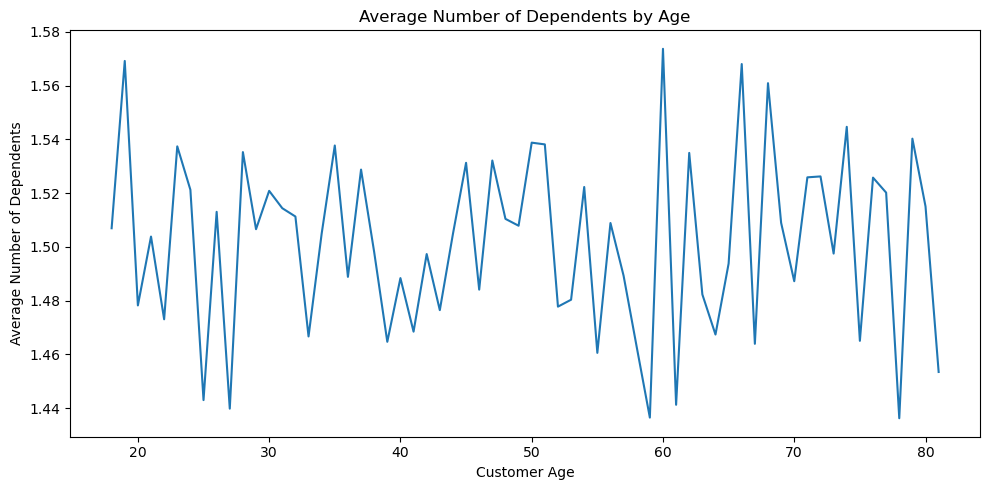

In [10]:
# --------------------------------------------
# Step 6B: Line Chart – Age vs Number of Dependents
# --------------------------------------------

plt.figure(figsize=(10, 5))

plt.plot(
    age_dependents['age'],
    age_dependents['n_dependants']
)

plt.title('Average Number of Dependents by Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Number of Dependents')

plt.tight_layout()
plt.show()


### Step 6C: Line Chart Interpretation – Age and Family Situation
The line chart shows that the average number of dependents per customer remains relatively consistent across all age groups. From ages 18 through older adulthood, the average number of dependents fluctuates only slightly, staying close to approximately 1.5 dependents per customer.

There is no clear upward or downward trend indicating a strong relationship between customer age and family size. While minor variations appear at certain ages, these changes are small and likely reflect normal variation in the data rather than meaningful demographic shifts.

From a business perspective, this suggests that age alone is not a strong predictor of household size in this dataset. As a result, targeted marketing strategies based solely on age may not effectively differentiate customers by family situation, and additional variables would be needed to better understand household-driven purchasing behavior.


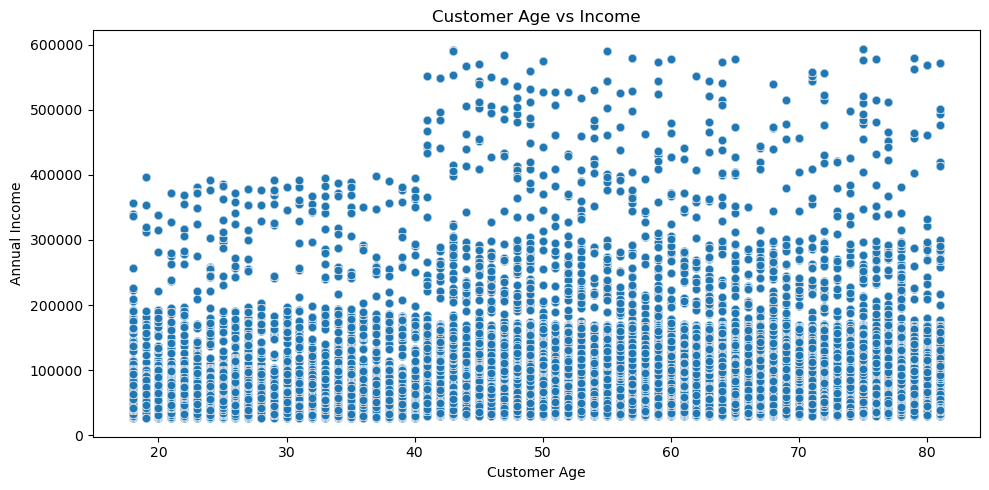

In [11]:
# --------------------------------------------
# Step 7A: Scatterplot – Age vs Income
# --------------------------------------------
# This scatterplot explores the relationship between
# customer age and spending power (income).

plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x='age',
    y='income',
    alpha=0.3
)

plt.title('Customer Age vs Income')
plt.xlabel('Customer Age')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()

### Step 7B: Scatterplot Interpretation – Customer Age vs Income

This scatterplot illustrates the relationship between customer age and annual income across the Instacart customer base. Overall, the visualization shows **no strong linear relationship** between age and income, as income values are widely dispersed across all age groups.

Customers at nearly every age exhibit a broad range of income levels, indicating that higher or lower income is **not strongly associated with a specific age group**. While some older customers appear among higher income values, this pattern is **inconsistent and highly variable**, suggesting only a weak association rather than a clear trend.

From a business perspective, this suggests that **age alone is not a reliable indicator of spending power**. Therefore, marketing strategies based solely on customer age may be less effective than approaches that incorporate additional factors such as purchasing behavior, loyalty status, or product preferences.

In [13]:
# ------------------------------------------------
# Step 8A: Define export path for visualizations
# ------------------------------------------------

viz_path = r"F:\Data Analytics\Projects\Instacart_Basket_Analysis\Instacart Basket Analysis 01-05-2026\04 Analysis\Visualizations\Exercise_4.9_Part_2"

# Confirm path exists
os.path.exists(viz_path)

True

In [14]:
# ------------------------------------------------
# Step 8B: Save histogram – Orders by Hour of Day
# ------------------------------------------------

plt.figure(figsize=(10, 5))

plt.hist(
    df['order_hour_of_day'],
    bins=24,
    edgecolor='black'
)

plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'hist_orders_by_hour.png'))
plt.close()

In [16]:
# ------------------------------------------------
# Step 8C: Save bar chart – Customer Loyalty Distribution
# ------------------------------------------------

plt.figure(figsize=(8, 5))

df['loyalty_flag'].value_counts().plot(kind='bar')

plt.title('Distribution of Orders by Customer Loyalty')
plt.xlabel('Customer Loyalty Group')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'bar_loyalty_distribution.png'))
plt.close()

In [17]:
# ------------------------------------------------
# Step 8D: Save line chart – Average Price by Hour of Day
# ------------------------------------------------

plt.figure(figsize=(10, 5))

plt.plot(
    price_by_hour['order_hour_of_day'],
    price_by_hour['prices']
)

plt.title('Average Product Price by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Average Product Price ($)')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'line_avg_price_by_hour.png'))
plt.close()

In [18]:
# ------------------------------------------------
# Step 8E: Save line chart – Age vs Number of Dependents
# ------------------------------------------------

plt.figure(figsize=(10, 5))

plt.plot(
    age_dependents['age'],
    age_dependents['n_dependants']
)

plt.title('Average Number of Dependents by Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Number of Dependents')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'line_age_vs_dependents.png'))
plt.close()

In [19]:
# ------------------------------------------------
# Step 8F: Save scatterplot – Age vs Income
# ------------------------------------------------

plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=df,
    x='age',
    y='income',
    alpha=0.3
)

plt.title('Customer Age vs Income')
plt.xlabel('Customer Age')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'scatter_age_vs_income.png'))
plt.close()

In [20]:
# ------------------------------------------------
# Step 8G: Verify saved visualization files
# ------------------------------------------------

os.listdir(viz_path)

['hist_orders_by_hour.png',
 'bar_loyalty_distribution.png',
 'line_avg_price_by_hour.png',
 'line_age_vs_dependents.png',
 'scatter_age_vs_income.png']